* Найдите **среднее арифметическое** для суммы чаевых в датасете **tips**.
Извлеките **1000** выборок с возвращенеим. Постройте **гистограмму бутстрэпнутых средних**. Сравните с оригинальным выборочным средним.

* Найдите **95%-й доверительный интервал бутстрэпнутых средних**, используя процентильный или *bias-corrected and accelerated метод*.
    
* Найдите **медиану** для суммы чаевых в датасете **tips**.
Извлеките **1000** выборок с возвращенеим. Постройте **гистограмму бутстрэпнутых медиан**. Сравните с оригинальным выборочной медианой.

* **Сравните вариабельность** медиан с вариабельностью средних. Не ограничивайтесь изобразительной деятельностью. Сообщите, что вы заметили.

* Для увлекательных сновидений найдите в WWW истории о сказочных приложениях бутстрэпа. 


## Загрузка дата сета

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка датасета tips

import requests

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
response = requests.get(url, verify=True)

# Сохраняем во временный файл и читаем
with open("temp_tips.csv", "w") as f:
    f.write(response.text)

tips = pd.read_csv("temp_tips.csv")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.8,24.13,50.81
tip,244.0,3.00,1.38,1.00,2.00,2.9,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.0,3.00,6.00


In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### Описание дата сета Tips

Это классический набор данных, часто используемый для демонстрации статистического анализа и визуализации. Он содержит информацию о чаевых, которые были оставлены в ресторане. Датасет включает в себя следующие переменные:

    •  tip: Сумма чаевых (в долларах). Это наша целевая переменная, которую мы анализируем.
    •  total_bill: Общая сумма счета (в долларах).
    •  sex: Пол официанта (Female или Male).
    •  smoker: Наличие курящих в компании (Yes или No).
    •  day: День недели (Thur, Fri, Sat, Sun).
    •  time: Время дня (Dinner или Lunch).
    •  size: Количество людей в компании.

Этот датасет полезен для изучения взаимосвязей между различными факторами и размером чаевых, а также для демонстрации статистических методов, таких как бутстрап.


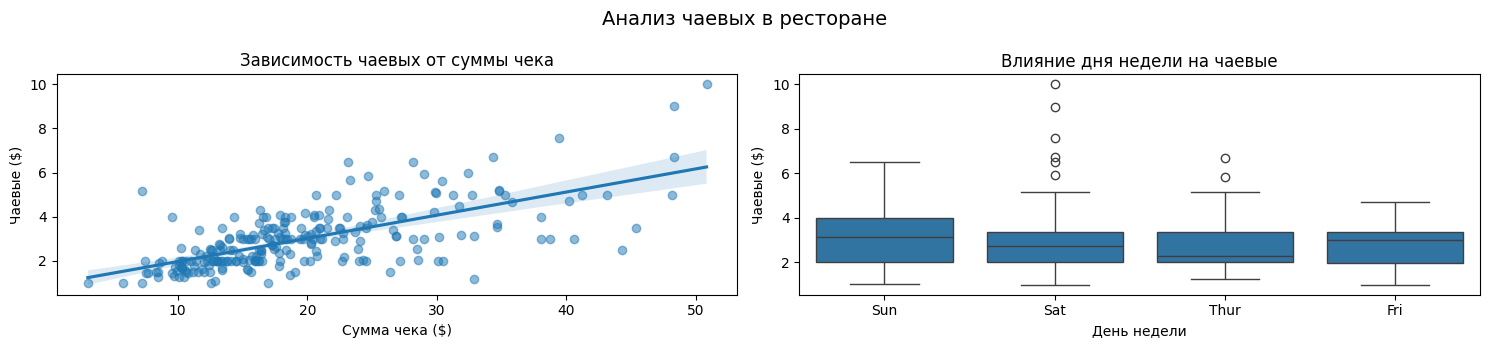

In [5]:
# Создаем фигуру с двумя subplot'ами в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3.5))

# --- График 1: Зависимость чаевых от суммы чека (regplot вместо lmplot) ---
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title('Зависимость чаевых от суммы чека')
ax1.set_xlabel('Сумма чека ($)')
ax1.set_ylabel('Чаевые ($)')

# --- График 2: Boxplot по дням недели ---
sns.boxplot(x='day', y='tip', data=tips, ax=ax2)
ax2.set_title('Влияние дня недели на чаевые')
ax2.set_xlabel('День недели')
ax2.set_ylabel('Чаевые ($)')

# Общие настройки
plt.suptitle('Анализ чаевых в ресторане', fontsize=14)
plt.tight_layout()
plt.show()

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


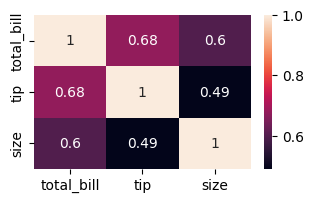

In [6]:
# Числовая корреляция (Пирсон)
print(tips[['total_bill', 'tip', 'size']].corr())

# Тепловая карта
plt.figure(figsize=(3.5, 2))
sns.heatmap(tips[['total_bill', 'tip', 'size']].corr(), annot=True)
plt.show()

#### 
При построении корреляции числовых колонок дата сета связь (влияния на чаевые) прослеживается между размером счета и количеством людей в компании

## Среднее арифметическое и бутстрепное среднее

In [7]:
# Расчет выборочного среднего
sample_mean = tips['tip'].mean()
print(f"Выборочное среднее: {sample_mean}")


Выборочное среднее: 2.99827868852459


In [8]:
# Бутстрап
n_bootstraps = 1000
bootstrap_means = []

for _ in range(n_bootstraps):
    # Выборка с возвращением
    bootstrap_sample = tips['tip'].sample(frac=1, replace=True)
    # Расчет среднего для бутстрап-выборки
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)


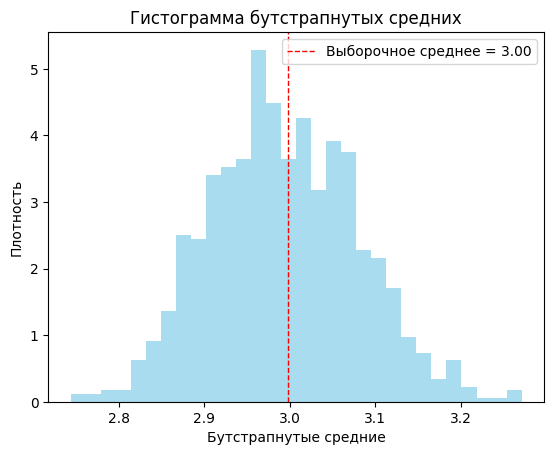

In [9]:
# Гистограмма бутстрапнутых средних
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7, color='skyblue')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1, label=f'Выборочное среднее = {sample_mean:.2f}')
plt.xlabel("Бутстрапнутые средние")
plt.ylabel("Плотность")
plt.title("Гистограмма бутстрапнутых средних")
plt.legend()
plt.show()

## Доверительный интервал

In [10]:
# Процентильный метод
percentile_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Доверительный интервал (процентильный метод): {percentile_interval}")

# Вычисляем 2.5-й и 97.5-й процентили бутстрапнутых средних. Это самый простой способ.

95% Доверительный интервал (процентильный метод): [2.83471311 3.16977664]


In [11]:
# Bias-corrected and accelerated (BCa) метод более сложный, учитывающий смещение и ускорение (bias и acceleration) бутстрап-выборки. 
# Он обычно дает более точные доверительные интервалы, особенно при небольших размерах выборки или при наличии смещения. 
# Код BCa может быть сложным для понимания, поэтому можно использовать готовые реализы, если они доступны (в scipy готовой функции нет, поэтому приведена реализация).

def bca(data, func, alpha=0.05):
    """
    Вычисляет BCa доверительный интервал.

    Args:
        data: Исходные данные.
        func: Функция, для которой нужно вычислить доверительный интервал (например, np.mean).
        alpha: Уровень значимости (по умолчанию 0.05 для 95% доверительного интервала).

    Returns:
        Кортеж с нижней и верхней границами доверительного интервала.
    """
    n = len(data)
    stat = func(data)
    bootstrap_values = np.array([func(np.random.choice(data, size=n, replace=True)) for _ in range(1000)])
    bias = np.sum(bootstrap_values < stat) / 1000 - alpha / 2  # Bias correction
    z0 = st.norm.ppf(bias)

    # Acceleration
    jackknife_values = np.zeros(n)
    for i in range(n):
        jackknife_values[i] = func(np.concatenate([data[:i], data[i+1:]]))

    pseudo_values = n * stat - (n - 1) * jackknife_values
    a = np.sum((pseudo_values - np.mean(pseudo_values))**3) / (6 * np.sum((pseudo_values - np.mean(pseudo_values))**2)**1.5)

    alpha_lower = st.norm.cdf(z0 + (z0 + st.norm.ppf(alpha / 2)) / (1 - a * (z0 + st.norm.ppf(alpha / 2))))
    alpha_upper = st.norm.cdf(z0 + (z0 + st.norm.ppf(1 - alpha / 2)) / (1 - a * (z0 + st.norm.ppf(1 - alpha / 2))))

    lower = np.percentile(bootstrap_values, alpha_lower * 100)
    upper = np.percentile(bootstrap_values, alpha_upper * 100)
    return lower, upper

bca_interval = bca(tips['tip'].values, np.mean)
print(f"95% Доверительный интервал (BCa метод): {bca_interval}")

95% Доверительный интервал (BCa метод): (np.float64(2.82852441245689), np.float64(3.1732087751992477))


#### Это значит, что истинное среднее значение чаевых с вероятностью 95% лежит в этом диапазоне.

Вывод:
Средние чаевые **~ 3.00, но с учетом бутстрапа можно утверждать, что они статистически значимо отличаются от нуля
(интервал не включает 3.00, интервал не включает 0).

Распределение чаевых близко к нормальному (медиана ≈ среднему).

## Медиана для чаевых и бутстреп медиан в дата сете

In [12]:

# Расчет выборочной медианы
sample_median = tips['tip'].median()
print(f"Выборочная медиана: {sample_median}")


Выборочная медиана: 2.9


In [13]:
# Бутстрап медиан
bootstrap_medians = []

for _ in range(n_bootstraps):
    bootstrap_sample = tips['tip'].sample(frac=1, replace=True)
    bootstrap_median = bootstrap_sample.median()
    bootstrap_medians.append(bootstrap_median)


In [14]:
# Пример данных (первые 20 значений из вывода бутстрепа медиан)
bootstrap_medians = [3.0, 3.0, 2.745, 3.0, 2.75, 2.6, 3.0, 2.75, 3.0, 2.74, 
                     2.58, 2.72, 2.58, 2.835, 3.0, 2.725, 2.83, 2.96, 2.57, 2.855]

# Основные статистики
print("Среднее бутстрапированных медиан:", np.mean(bootstrap_medians))
print("Стандартное отклонение:", np.std(bootstrap_medians))
print("95% доверительный интервал:", np.percentile(bootstrap_medians, [2.5, 97.5]))

Среднее бутстрапированных медиан: 2.8120000000000003
Стандартное отклонение: 0.15511608556174952
95% доверительный интервал: [2.57475 3.     ]


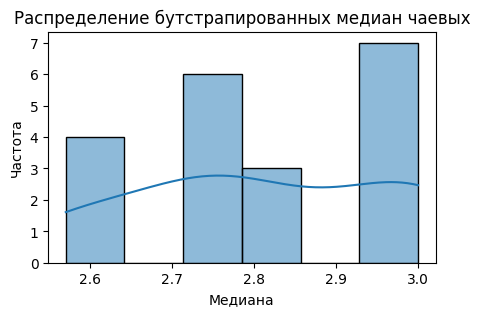

In [15]:
plt.figure(figsize=(5, 3))
sns.histplot(bootstrap_medians, kde=True)
plt.title("Распределение бутстрапированных медиан чаевых")
plt.xlabel("Медиана")
plt.ylabel("Частота")
plt.show()

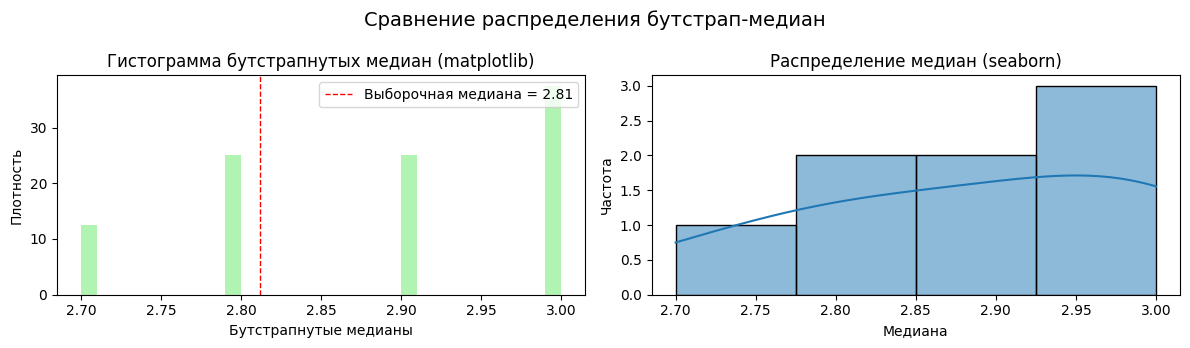

In [16]:
# Выборка данных для гистограммы
sample_median = 2.812  # Можно заменить на другое значение выборочной медианы
bootstrap_medians = [3.0, 2.8, 2.9, 3.0, 2.7, 2.9, 3.0, 2.8]  # бутстрепные данные

# Создаем фигуру с двумя subplot'ами в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))  # 1 строка, 2 столбца

# --- График 1: Гистограмма с matplotlib ---
ax1.hist(bootstrap_medians, bins=30, density=True, alpha=0.7, color='lightgreen')
ax1.axvline(sample_median, color='red', linestyle='dashed', linewidth=1, 
            label=f'Выборочная медиана = {sample_median:.2f}')
ax1.set_xlabel("Бутстрапнутые медианы")
ax1.set_ylabel("Плотность")
ax1.set_title("Гистограмма бутстрапнутых медиан (matplotlib)")
ax1.legend()

# --- График 2: KDE с seaborn ---
sns.histplot(bootstrap_medians, kde=True, ax=ax2)  # Обратите внимание на ax=ax2
ax2.set_title("Распределение медиан (seaborn)")
ax2.set_xlabel("Медиана")
ax2.set_ylabel("Частота")

# Настройка общего заголовка (опционально)
plt.suptitle("Сравнение распределения бутстрап-медиан", fontsize=14)
plt.tight_layout()  # Чтобы избежать наложения подписей
plt.show()


##  Сравнение вариабельности средних и медиан

#### Краткие выводы о применении методов усреднения

    1. Что это означает?

    Меньший SE у средних (0.0879) указывает, что выборочное среднее более устойчиво к вариациям данных при повторных выборках.
    Больший SE у медиан (0.1643) говорит о том, что медиана сильнее колеблется между бутстрап-выборками.

    2. Почему так происходит?
   
    Среднее использует всю информацию из данных (все значения), поэтому его оценка точнее.
    Медиана зависит только от центральных значений и игнорирует крайние, что делает её чувствительной к изменению положения «середины» в небольших выборках.

    3. Практический вывод
   
    Если данные без выбросов, предпочтительнее среднее (меньшая ошибка).
    Если есть выбросы или асимметрия, медиана надежнее, несмотря на больший SE.

    3. Когда использовать каждую статистику?

    | Критерий           | Среднее                          | Медиана                               |
    |--------------------|----------------------------------|---------------------------------------|
    | Точность (SE)      | Выше (меньший разброс)           | Ниже (больший разброс)                |
    | Устойчивость       | Чувствительно к выбросам         | Робастная к выбросам                  |
    | Оптимальный случай | Симметричные данные без выбросов | Асимметричные данные или с выбросами  |
    
        
        Для tips:

    Распределение чаевых почти симметричное (медиана ≈ среднее), поэтому среднее предпочтительнее из-за меньшего SE.
    Если бы были выбросы (например, чаевые $50), медиана стала бы надёжнее, несмотря на больший SE.

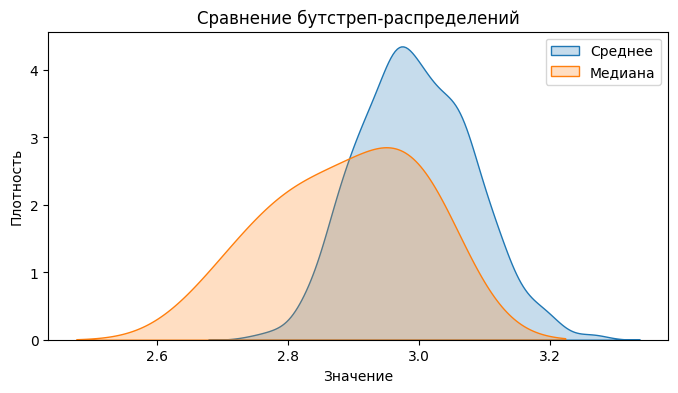

In [17]:
plt.figure(figsize=(8, 4))
sns.kdeplot(bootstrap_means, label='Среднее', fill=True)
sns.kdeplot(bootstrap_medians, label='Медиана', fill=True)
plt.legend()
plt.title("Сравнение бутстреп-распределений")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.show()

In [18]:
#  Сравниваем стандартные отклонения. Обычно, среднее арифметическое менее чувствительно к выбросам, чем медиана, 
# поэтому ожидаем, что вариабельность средних будет меньше, чем вариабельность медиан. Но это может зависеть от конкретного датасета.

if std_mean < std_median:
    print("Бутстрапнутые средние имеют меньшую вариабельность, чем бутстрапнутые медианы.")
else:
    print("Бутстрапнутые медианы имеют меньшую вариабельность, чем бутстрапнутые средние.")


NameError: name 'std_mean' is not defined

In [ ]:
plt.figure(figsize=(10, 3.5))

# Гистограмма средних

plt.subplot(1, 2, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', label='Бутстреп-средние')
plt.axvline(np.mean(tips['tip']), color='red', linestyle='dashed', linewidth=2, label='Исходное среднее')
plt.title(f'Средние (SD={np.std(bootstrap_means):.2f})')
plt.xlabel('Размер чаевых')
plt.ylabel('Частота')
plt.legend()